# Heart Diseases Dataset Preprocessing

Description

## TODO 

* [ ] Feature descriptions
* [X] Missing Data
* [X] Column types
* [ ] Distribution
* [ ] Correlations

## Import libraries

In [1]:
from datetime import datetime
import logging
_NOTEBOOK_START = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
logging.basicConfig(filename=f'logs/heart_{_NOTEBOOK_START}.log', encoding='utf-8', level=logging.DEBUG, format='%(levelname)s:%(asctime)s:%(message)s')

In [2]:
import os
_ABSOLUTE_DIR = os.getcwd()

import numpy as np
import pandas as pd

## Viz Libraries
import seaborn as sns

## SKLEARN LIBRARIES
from sklearn.preprocessing import OneHotEncoder

logging.info(f'Imports loaded')

## Load Data

In [3]:
dfHeart_raw = pd.read_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/heart/heart_raw.csv')
logging.info(f'Load dataset from {_ABSOLUTE_DIR}/../artifacts/data/heart/heart_raw.csv')

In [4]:
dfHeart_raw

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## Missing Data

In [5]:
dfHeart_raw.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

-------

We can see that there are no missing data in this dataset.

In [6]:
for FEATURE in dfHeart_raw.select_dtypes(include=['object']):
    logging.debug(f'FEATURE {FEATURE} UNIQUE VALUES')
    print(dfHeart_raw[FEATURE].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


-------

There are also no categories in categorical features which indicate missing values, except in the Race feature, with the category *Other*

## Column types

In [7]:
dfHeart_raw.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

----

In a first eye look, we can notice that the Yes/No features are encoded as object (strings) but they are binary. So our first approach is to transform these features into boolean.    


Lets do that then

In [8]:
logging.debug('Create copy of dataset')
dfHeart_v1 = dfHeart_raw.copy()

### Yes/No Features

In [9]:
logging.debug('Creating _STRING_TO_BOOL_FEATURES')
_STRING_TO_BOOL_FEATURES = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'] 

In [10]:
for _FEATURE in _STRING_TO_BOOL_FEATURES:
    logging.debug(f'FEATURE {_FEATURE} TO BOOL')
    dfHeart_v1[_FEATURE] = dfHeart_v1[_FEATURE].map({'Yes':True, 'No':False})

In [11]:
dfHeart_v1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,16.60,True,False,False,3.0,30.0,False,Female,55-59,White,True,True,Very good,5.0,True,False,True
1,False,20.34,False,False,True,0.0,0.0,False,Female,80 or older,White,False,True,Very good,7.0,False,False,False
2,False,26.58,True,False,False,20.0,30.0,False,Male,65-69,White,True,True,Fair,8.0,True,False,False
3,False,24.21,False,False,False,0.0,0.0,False,Female,75-79,White,False,False,Good,6.0,False,False,True
4,False,23.71,False,False,False,28.0,0.0,True,Female,40-44,White,False,True,Very good,8.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,True,27.41,True,False,False,7.0,0.0,True,Male,60-64,Hispanic,True,False,Fair,6.0,True,False,False
319791,False,29.84,True,False,False,0.0,0.0,False,Male,35-39,Hispanic,False,True,Very good,5.0,True,False,False
319792,False,24.24,False,False,False,0.0,0.0,False,Female,45-49,Hispanic,False,True,Good,6.0,False,False,False
319793,False,32.81,False,False,False,0.0,0.0,False,Female,25-29,Hispanic,False,False,Good,12.0,False,False,False


In [12]:
dfHeart_v1.dtypes

HeartDisease           bool
BMI                 float64
Smoking                bool
AlcoholDrinking        bool
Stroke                 bool
PhysicalHealth      float64
MentalHealth        float64
DiffWalking            bool
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity       bool
GenHealth            object
SleepTime           float64
Asthma                 bool
KidneyDisease          bool
SkinCancer             bool
dtype: object

------

Other features that need to be worked on are the Sex, Race and GenHealth.  
* Sex can be transformed into a boolean
* Race into a onehot encoding maybe
* Due to the scalar nature of GenHealth, it can be transformed into integers. 



### GenHealth

In [13]:
dfHeart_v1.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [14]:
logging.debug(f'FEATURE GenHealth TO INTEGER')
dfHeart_v1['GenHealth'] = dfHeart_v1['GenHealth'].map({'Poor':1, 'Fair':2, 'Good':3, 'Very Good':4, 'Excellent':5})

### Sex

In [15]:
dfHeart_v1.Sex.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
logging.debug(f'FEATURE Sex TO INTEGER')
dfHeart_v1['Sex'] = dfHeart_v1['Sex'].map({'Female':1, 'Male':0})

### Race

In [17]:
dfHeart_v1.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [18]:
logging.debug(f'FEATURE Race TO OneHotEncoding')
dfHeart_v1[['race_American Indian/Alaskan Nativerace', 'race_Asian', 'race_Black', 'race_Hispanic','race_Other','race_White']] = pd.get_dummies(dfHeart_v1.Race)
dfHeart_v1.drop(columns=['Race'])

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,race_American Indian/Alaskan Nativerace,race_Asian,race_Black,race_Hispanic,race_Other,race_White
0,False,16.60,True,False,False,3.0,30.0,False,1,55-59,...,5.0,True,False,True,0,0,0,0,0,1
1,False,20.34,False,False,True,0.0,0.0,False,1,80 or older,...,7.0,False,False,False,0,0,0,0,0,1
2,False,26.58,True,False,False,20.0,30.0,False,0,65-69,...,8.0,True,False,False,0,0,0,0,0,1
3,False,24.21,False,False,False,0.0,0.0,False,1,75-79,...,6.0,False,False,True,0,0,0,0,0,1
4,False,23.71,False,False,False,28.0,0.0,True,1,40-44,...,8.0,False,False,False,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,True,27.41,True,False,False,7.0,0.0,True,0,60-64,...,6.0,True,False,False,0,0,0,1,0,0
319791,False,29.84,True,False,False,0.0,0.0,False,0,35-39,...,5.0,True,False,False,0,0,0,1,0,0
319792,False,24.24,False,False,False,0.0,0.0,False,1,45-49,...,6.0,False,False,False,0,0,0,1,0,0
319793,False,32.81,False,False,False,0.0,0.0,False,1,25-29,...,12.0,False,False,False,0,0,0,1,0,0


## Distributions

### Heart Disease

Lets first look at Heart Disease to understand if we are dealing with imbalanced targets.




/home/portugapt/miniconda3/envs/aaa-project/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

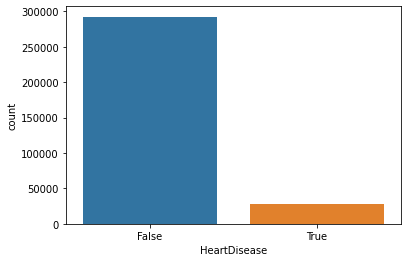

In [19]:
sns.countplot(dfHeart_v1['HeartDisease'])

We are definitely dealing with an unbalanced dataset. 

There are a few solutions we can take. 
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/   
   * Choose Proper Evaluation Metric
   * Resampling (Oversampling and Undersampling)
   * SMOTE
       * https://towardsdatascience.com/stop-using-smote-to-handle-all-your-imbalanced-data-34403399d3be
   * BalancedBaggingClassifier
   * Threshold moving       
      
In the preparation step, we will decide which option is the best.

### Boolean Features